By The End Of This Session You Should Be Able To:
----

- Explore data with Pandas to answer conceptual questions
- Write chained commands for effecient one-liners
- Use variables to _D.R.Y. out your code_

Load the `bike_share_201402_trip_data` data into a dataframe.  

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("data/bike_share_201402_trip_data.csv")
df.head()

Trip ID  Duration       Start Date             Start Station  \
0     4576        63  8/29/2013 14:13  South Van Ness at Market   
1     4607        70  8/29/2013 14:42        San Jose City Hall   
2     4130        71  8/29/2013 10:16   Mountain View City Hall   
3     4251        77  8/29/2013 11:29        San Jose City Hall   
4     4299        83  8/29/2013 12:02  South Van Ness at Market   

   Start Terminal         End Date               End Station  End Terminal  \
0              66  8/29/2013 14:14  South Van Ness at Market            66   
1              10  8/29/2013 14:43        San Jose City Hall            10   
2              27  8/29/2013 10:17   Mountain View City Hall            27   
3              10  8/29/2013 11:30        San Jose City Hall            10   
4              66  8/29/2013 12:04            Market at 10th            67   

   Bike # Subscription Type Zip Code  
0     520        Subscriber    94127  
1     661        Subscriber    95138  
2      48        Subscriber    97214  
3      26        Subscriber    95060  
4     319        Subscriber    94103

How many observations are there?

In [5]:
df.shape

(144015, 11)

Change the columns to be Pythonic:

- lowercase 
- replace " " with `_` as a separator
- replace "#" with `num` 

<br>

<details><summary>
Click here for a hint…
</summary>
http://nbviewer.jupyter.org/github/rasbt/python_reference/blob/master/tutorials/things_in_pandas.ipynb#Renaming-Columns
</details>

In [8]:
columns = df.columns.to_list()
columns = [col.lower().replace(" ","_").replace("#","num") for col in columns]
df.columns = columns
df.head()

trip_id  duration       start_date             start_station  \
0     4576        63  8/29/2013 14:13  South Van Ness at Market   
1     4607        70  8/29/2013 14:42        San Jose City Hall   
2     4130        71  8/29/2013 10:16   Mountain View City Hall   
3     4251        77  8/29/2013 11:29        San Jose City Hall   
4     4299        83  8/29/2013 12:02  South Van Ness at Market   

   start_terminal         end_date               end_station  end_terminal  \
0              66  8/29/2013 14:14  South Van Ness at Market            66   
1              10  8/29/2013 14:43        San Jose City Hall            10   
2              27  8/29/2013 10:17   Mountain View City Hall            27   
3              10  8/29/2013 11:30        San Jose City Hall            10   
4              66  8/29/2013 12:04            Market at 10th            67   

   bike_num subscription_type zip_code  
0       520        Subscriber    94127  
1       661        Subscriber    95138  
2        48        Subscriber    97214  
3        26        Subscriber    95060  
4       319        Subscriber    94103

How many types of subscription options are there?

In [16]:
df.subscription_type.unique()

array(['Subscriber', 'Customer'], dtype=object)

What is the frequency of each subscription option?

In [58]:
df_grouped = df.groupby("subscription_type")
df.subscription_type.value_counts(normalize=True)

Subscriber    0.789133
Customer      0.210867
Name: subscription_type, dtype: float64

Please plot the frequency of each subscription option with pie chart:

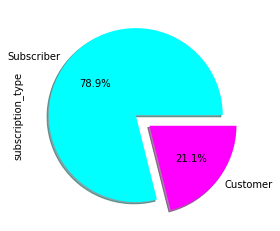

In [53]:
df.subscription_type.value_counts().plot(kind="pie", autopct='%1.1f%%', shadow = True, explode =(0, 0.2), colors = ("cyan", "magenta"));
plt.title="Subscriptions"

Please plot the frequency of each subscription option with bar chart:

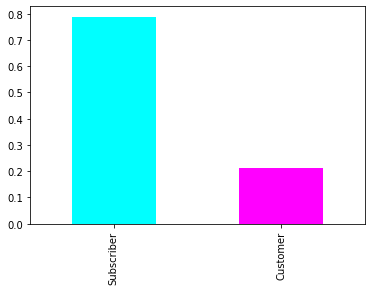

In [57]:
df.subscription_type.value_counts(normalize = True).plot(kind="bar", color = ("cyan", "magenta"));


Repeat same analysis for start_station but sorted from high to low.

In [68]:
df2=df.sort_values("start_station")
df2.head()

trip_id  duration        start_date  start_station  start_terminal  \
15364    25251       357   9/17/2013 20:03  2nd at Folsom              62   
38298    55244      1531  10/12/2013 10:55  2nd at Folsom              62   
38254    55169       370   10/12/2013 9:33  2nd at Folsom              62   
3757      9816       130    9/3/2013 14:14  2nd at Folsom              62   
10100    18331       337   9/11/2013 19:45  2nd at Folsom              62   

               end_date                               end_station  \
15364   9/17/2013 20:09                           2nd at Townsend   
38298  10/12/2013 11:20                        Powell Street BART   
38254   10/12/2013 9:39                             5th at Howard   
3757     9/3/2013 14:16                             Howard at 2nd   
10100   9/11/2013 19:50  San Francisco Caltrain (Townsend at 4th)   

       end_terminal  bike_num subscription_type zip_code  
15364            61       575        Subscriber    94107  
38298            39       483        Subscriber    94104  
38254            57       551        Subscriber    94103  
3757             63       443          Customer    94105  
10100            70       326        Subscriber    94158

In [67]:
df.start_station.value_counts(normalize=True)

San Francisco Caltrain (Townsend at 4th)         0.068312
Harry Bridges Plaza (Ferry Building)             0.050988
Embarcadero at Sansome                           0.045447
Market at Sansome                                0.041121
Temporary Transbay Terminal (Howard at Beale)    0.035503
                                                   ...   
Franklin at Maple                                0.000687
Broadway at Main                                 0.000312
Redwood City Public Library                      0.000306
San Jose Government Center                       0.000160
Mezes Park                                       0.000021
Name: start_station, Length: 69, dtype: float64

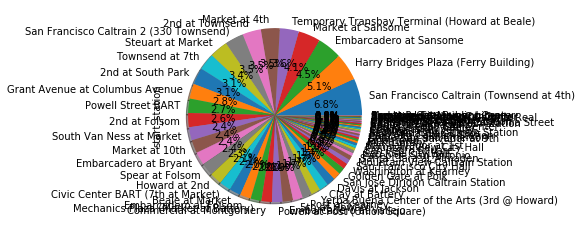

In [70]:
df.start_station.value_counts().plot(kind="pie", autopct='%1.1f%%', shadow = True);

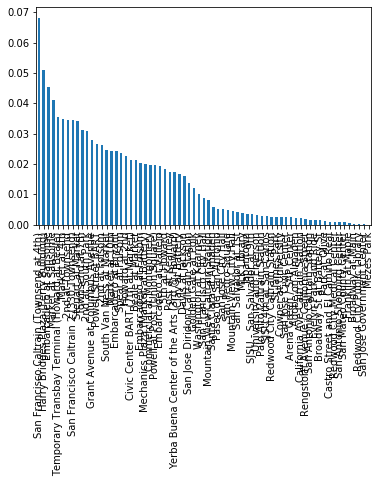

In [73]:
df.start_station.value_counts(normalize=True).plot(kind="bar");

Repeat same analysis for end_station but sorted from __low to high__.

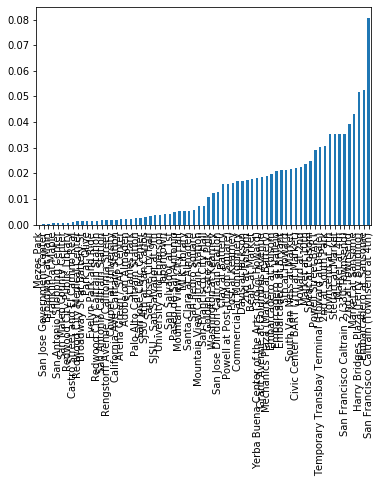

In [75]:
df.end_station.value_counts(normalize=True, ascending = True).plot(kind="bar");

Looking at just most popular stations, what are the qualitative similarities and differences between start and end stations?

In [79]:
df.start_station.value_counts().head()

San Francisco Caltrain (Townsend at 4th)         9838
Harry Bridges Plaza (Ferry Building)             7343
Embarcadero at Sansome                           6545
Market at Sansome                                5922
Temporary Transbay Terminal (Howard at Beale)    5113
Name: start_station, dtype: int64

In [80]:
df.end_station.value_counts().head()

San Francisco Caltrain (Townsend at 4th)    11637
Embarcadero at Sansome                       7590
Harry Bridges Plaza (Ferry Building)         7475
Market at Sansome                            6238
2nd at Townsend                              5655
Name: end_station, dtype: int64

Create a table that has start_station segmented by subscription_type.

Include the marginals
<br>
<br>
<details><summary>
Click here for a hint…
</summary>
`pd.crosstab`
</details>

In [82]:
pd.crosstab(df.start_station, df.subscription_type, margins=True)

subscription_type                              Customer  Subscriber     All
start_station                                                              
2nd at Folsom                                       427        3349    3776
2nd at South Park                                   535        3923    4458
2nd at Townsend                                     882        4105    4987
5th at Howard                                       606        2029    2635
Adobe on Almaden                                     75         260     335
...                                                 ...         ...     ...
Townsend at 7th                                     518        3975    4493
University and Emerson                              328         106     434
Washington at Kearney                               561         911    1472
Yerba Buena Center of the Arts (3rd @ Howard)       628        1859    2487
All                                               30368      113647  144015

[70 rows x 3 columns]

-----

Let's look at duration....

How long is the shortest trip? How many are that short?

In [114]:
df[df["duration"] <= df.duration.min()].shape

(17, 11)

What do you think is going on with the shrort trips?

In [ ]:
immediate return

What is the longest trip? How many trips are "long"?

In [119]:
df.sort_values("duration", ascending=False)

trip_id  duration        start_date  \
55127     77650        60  10/30/2013 18:22   
124134   171822        60   1/30/2014 21:51   
10457     18792        60   9/12/2013 10:09   
7296      14644        60    9/8/2013 13:55   
11545     20271        60   9/13/2013 12:43   
...         ...       ...               ...   
95343    132103        67  12/20/2013 11:29   
15788     25829        67   9/18/2013 11:18   
6290      13323        67    9/7/2013 10:49   
3934      10093        67    9/3/2013 18:06   
33646     49063        67   10/7/2013 16:33   

                                   start_station  start_terminal  \
55127       Harry Bridges Plaza (Ferry Building)              50   
124134                           2nd at Townsend              61   
10457          Civic Center BART (7th at Market)              72   
7296    San Francisco Caltrain (Townsend at 4th)              70   
11545                              Market at 4th              76   
...                                          ...             ...   
95343                   South Van Ness at Market              66   
15788       Harry Bridges Plaza (Ferry Building)              50   
6290                       Embarcadero at Bryant              54   
3934                    South Van Ness at Market              66   
33646                          Steuart at Market              74   

                end_date                               end_station  \
55127   10/30/2013 18:23      Harry Bridges Plaza (Ferry Building)   
124134   1/30/2014 21:52                           2nd at Townsend   
10457    9/12/2013 10:10         Civic Center BART (7th at Market)   
7296      9/8/2013 13:56  San Francisco Caltrain (Townsend at 4th)   
11545    9/13/2013 12:44                             Market at 4th   
...                  ...                                       ...   
95343   12/20/2013 11:30                            Market at 10th   
15788    9/18/2013 11:19      Harry Bridges Plaza (Ferry Building)   
6290      9/7/2013 10:51                     Embarcadero at Bryant   
3934      9/3/2013 18:07                  South Van Ness at Market   
33646    10/7/2013 16:34                         Steuart at Market   

        end_terminal  bike_num subscription_type zip_code  
55127             50       416        Subscriber    94110  
124134            61       404        Subscriber    94107  
10457             72       632        Subscriber    94103  
7296              70       521        Subscriber    95126  
11545             76       500        Subscriber    94116  
...              ...       ...               ...      ...  
95343             67       504        Subscriber    94612  
15788             50       530        Subscriber    94111  
6290              54       508        Subscriber    94107  
3934              66       610        Subscriber    94117  
33646             74       320        Subscriber    94002  

[100 rows x 11 columns]

In [120]:
df[df["duration"] >= 86400].shape

(82, 11)

Do the long durations seem reasonable? Why are they so long? What could that tell us about the users?

In [ ]:
forgot to return it, maybe lost the bike before return

Timebox 15 minutes to explore the data guided by your own intuition or hypotheses…

Be prepared to show something to the rest of class.

In [122]:
df.zip_code.nunique()

2880

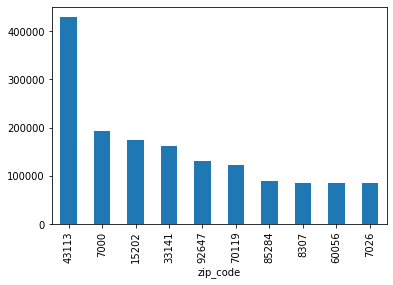

In [15]:
#df_grouped = df.groupby("zip_code")
df.groupby("zip_code").duration.mean().sort_values(ascending = False).head(10).plot(kind="bar")

In [26]:
newdf = df.zip_code.value_counts()+ df_grouped.duration.mean()
newdf[d]

43113    429385.0
7000     194136.0
15202    173804.0
33141    162217.5
92647    131941.0
           ...   
87031       189.0
67156       185.0
85008       183.0
35405       178.0
8525        154.5
Length: 2880, dtype: float64

In [9]:
df[df["zip_code"] >= 94000]

TypeError: '>=' not supported between instances of 'str' and 'int'

In [19]:
df[["zip_code","duration"]]

zip_code  duration
0         94127        63
1         95138        70
2         97214        71
3         95060        77
4         94103        83
...         ...       ...
144010    94404       385
144011    94111       145
144012    94102       677
144013    94124     64128
144014    94107       570

[144015 rows x 2 columns]

-----
Challenge Exercises
-----

Plot duration

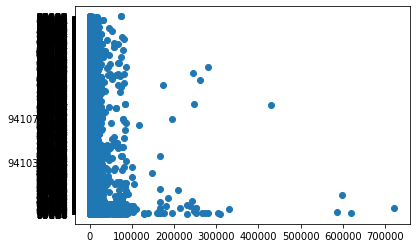

In [34]:
df_dropped = df.dropna()

plt.scatter(df_dropped.duration, df_dropped.zip_code)

Does that plot give insights?

Select subsections of the data to make a series of plots to enable insights for the Product Team

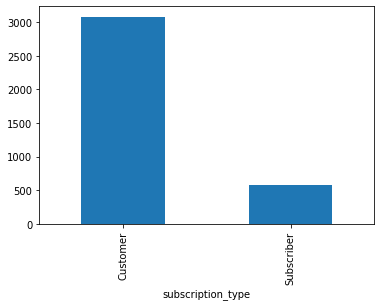

In [57]:
df_2 = df_dropped.query("duration <= 100000")
df_2_grouped = df_2.groupby("subscription_type")

df_2_grouped.duration.mean().plot(kind="bar");

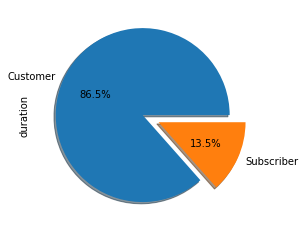

In [61]:
df_3 = df_dropped.query("duration >= 100000")
df_3_grouped = df_3.groupby("subscription_type")

df_3_grouped.duration.count().plot(kind="pie", explode=(0,0.2), shadow=True, autopct='%1.1f%%')

The Product Team would like all of the station names to be lower case and  with `_` as a seperator

`South Van Ness at Market` -> `south_van_ness_at_market`  

__DO NOT USE A FOR LOOP. THEY ARE THE 👿__

In [28]:
import re
df.start_station = df.start_station.replace(to_replace = " ", value = "_", regex = True).str.lower()
df.head()

trip_id  duration       start_date             start_station  \
0     4576        63  8/29/2013 14:13  south_van_ness_at_market   
1     4607        70  8/29/2013 14:42        san_jose_city_hall   
2     4130        71  8/29/2013 10:16   mountain_view_city_hall   
3     4251        77  8/29/2013 11:29        san_jose_city_hall   
4     4299        83  8/29/2013 12:02  south_van_ness_at_market   

   start_terminal         end_date               end_station  end_terminal  \
0              66  8/29/2013 14:14  South Van Ness at Market            66   
1              10  8/29/2013 14:43        San Jose City Hall            10   
2              27  8/29/2013 10:17   Mountain View City Hall            27   
3              10  8/29/2013 11:30        San Jose City Hall            10   
4              66  8/29/2013 12:04            Market at 10th            67   

   bike_num subscription_type zip_code  
0       520        Subscriber    94127  
1       661        Subscriber    95138  
2        48        Subscriber    97214  
3        26        Subscriber    95060  
4       319        Subscriber    94103

<br>
<br> 
<br>

----